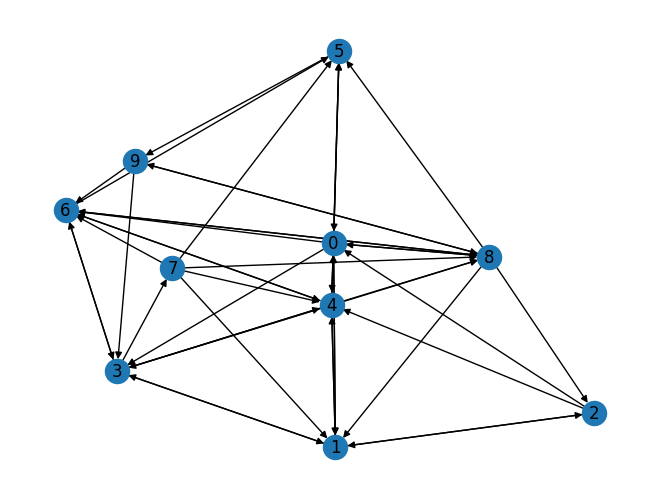

[(7, 0.035651403800464374), (2, 0.05639233812992568), (9, 0.07517086939401751), (5, 0.10010308852351206), (1, 0.11183626051688332), (6, 0.11715676473053226), (3, 0.121478993201804), (8, 0.12442575245799274), (4, 0.12514217718626516), (0, 0.1326423520586027)]
[(7, 25068), (2, 49384), (9, 71579), (5, 100605), (1, 112819), (6, 119891), (3, 126407), (4, 128003), (8, 128375), (0, 137870)]


In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import operator


G = nx.gnp_random_graph (10,0.5, directed=True)
nx.draw(G,with_labels=True)
plt.show()

x=random.choice([i for i in range(G.number_of_nodes())])
dict_counter={}

for i in range (G.number_of_nodes()):
  dict_counter [i]=0

dict_counter [x]=dict_counter [x]+1

for i in range(1000000):
  list_n=list(G. neighbors (x))
  if(len(list_n)==0): #if x is a sink
      x=random.choice([i for i in range (G.number_of_nodes())])
      dict_counter [x]=dict_counter [x]+1
  else:
      x=random.choice (list_n) #choose a node randomly from neighbours of it
      dict_counter [x]=dict_counter [x]+1

p=nx.pagerank (G)

sorted_p=sorted (p.items(), key=operator.itemgetter(1))
sorted_rw=sorted (dict_counter.items(), key=operator.itemgetter(1))
print(sorted_p)
print(sorted_rw)


**Point Distribution Method**

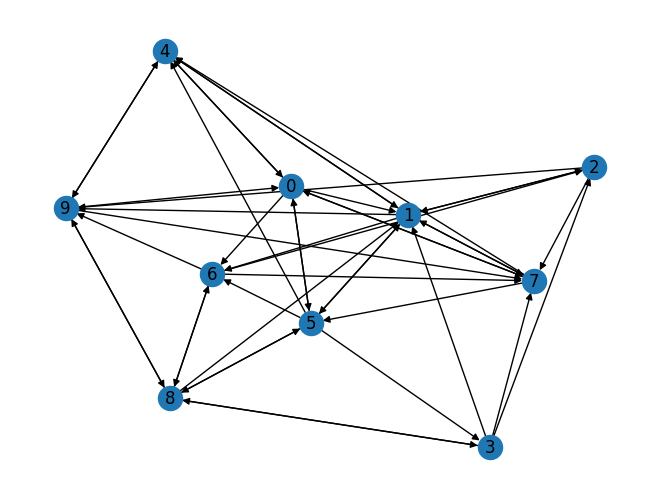

[100.0, 173.33333333333334, 66.66666666666667, 36.66666666666667, 103.33333333333334, 81.66666666666667, 73.33333333333334, 145.0, 91.66666666666667, 128.33333333333334]


KeyboardInterrupt: ignored

In [22]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def add_edges(G):
    nodes = list(G.nodes())

    for s in nodes:
        for t in nodes:
            if s != t:
                r = random.random()
                if r <= 0.5:
                    G.add_edge(s, t)
    return G

def assign_points(G):
    nodes = list(G.nodes())
    p = []
    for each in nodes:
        p.append(100)
    return p

def distribute_points(G, points):
    nodes = list(G.nodes())
    new_points = [0] * len(nodes)

    for n in nodes:
        out = list(G.out_edges(n))
        if len(out) == 0:
            new_points[n] = new_points[n] + points[n]
        else:
            share = points[n] / len(out)
            for (src, tgt) in out:
                new_points[tgt] = new_points[tgt] + share
    return new_points

def keep_distributing(points, G):
    while True:
        new_points = distribute_points(G, points)
        print(new_points)
        points = new_points
        stop = input("Press # to stop or any other key to continue: ")
        if stop == "#":
            break
    return new_points

# Create a directed graph
G = nx.DiGraph()
G.add_nodes_from([i for i in range(10)])
G = add_edges(G)

# Visualize the graph
nx.draw(G, with_labels=True)
plt.show()

# Assign initial points
points = assign_points(G)

# Keep distributing
final_points = keep_distributing(points, G)


**Web Graph Analysis with PageRank Visualization**

{'sitcoe.com': 145.0, 'geeksforgeeks.org': 50.0, 'tutorialspoint.com': 108.33333333333334, 'dkte.com': 95.0, 'walchand.com': 103.33333333333334, 'iit.edu': 36.66666666666667, 'nptel.ac.in': 75.0, 'harvard.edu': 186.66666666666669}
Press # to stop or any other key to continue: 
{'sitcoe.com': 178.61111111111114, 'geeksforgeeks.org': 18.333333333333336, 'tutorialspoint.com': 114.16666666666669, 'dkte.com': 85.27777777777779, 'walchand.com': 156.66666666666669, 'iit.edu': 23.333333333333336, 'nptel.ac.in': 65.83333333333334, 'harvard.edu': 157.7777777777778}
Press # to stop or any other key to continue: 
{'sitcoe.com': 172.33333333333337, 'geeksforgeeks.org': 11.666666666666668, 'tutorialspoint.com': 130.18518518518522, 'dkte.com': 93.44444444444447, 'walchand.com': 151.5925925925926, 'iit.edu': 16.222222222222225, 'nptel.ac.in': 70.64814814814815, 'harvard.edu': 153.90740740740742}
Press # to stop or any other key to continue: 
Press # to stop or any other key to continue: 
{'sitcoe.com'

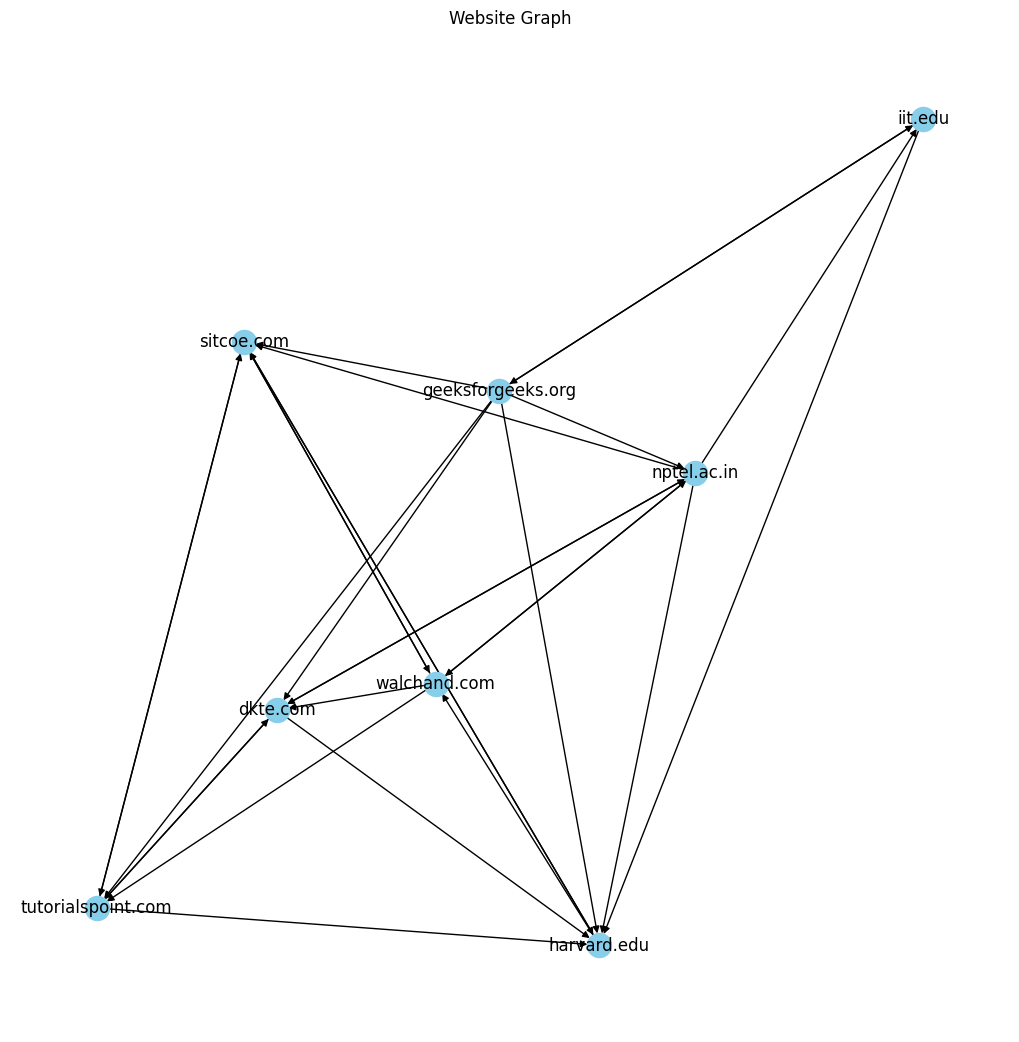

In [15]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Website-node mapping
website_nodes = {
    "sitcoe.com": "sitcoe.com",
    "geeksforgeeks.org": "geeksforgeeks.org",
    "tutorialspoint.com": "tutorialspoint.com",
    "dkte.com": "dkte.com",
    "walchand.com": "walchand.com",
    "iit.edu": "iit.edu",
    "nptel.ac.in": "nptel.ac.in",
    "harvard.edu": "harvard.edu"
    # Add more websites and corresponding nodes here
}

def add_edges(G):
    websites = list(website_nodes.keys())

    for s in websites:
        for t in websites:
            if s != t:
                r = random.random()
                if r <= 0.5:
                    G.add_edge(s, t)
    return G

def calculate_pagerank(G):
    pagerank = nx.pagerank(G)
    return pagerank

def plot_graph(G):
    plt.figure(figsize=(10, 10))

    # Draw the graph with labels
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='skyblue')

    plt.title("Website Graph")
    plt.show()

# Create a directed graph
G = nx.DiGraph()
websites = list(website_nodes.keys())
G.add_nodes_from(websites)
G = add_edges(G)

# Assign initial points
points = {website: 100 for website in websites}

def distribute_points(G, points):
    new_points = {website: 0 for website in websites}

    for website in websites:
        out = list(G.out_edges(website))
        if len(out) == 0:
            new_points[website] += points[website]
        else:
            share = points[website] / len(out)
            for (_, tgt) in out:
                new_points[tgt] += share
    return new_points

# Keep distributing
while True:
    new_points = distribute_points(G, points)
    print(new_points)
    points = new_points
    stop = input("Press # to stop or any other key to continue: ")
    if stop == "#":
        break

# Display the graph without PageRank information











plot_graph(G)


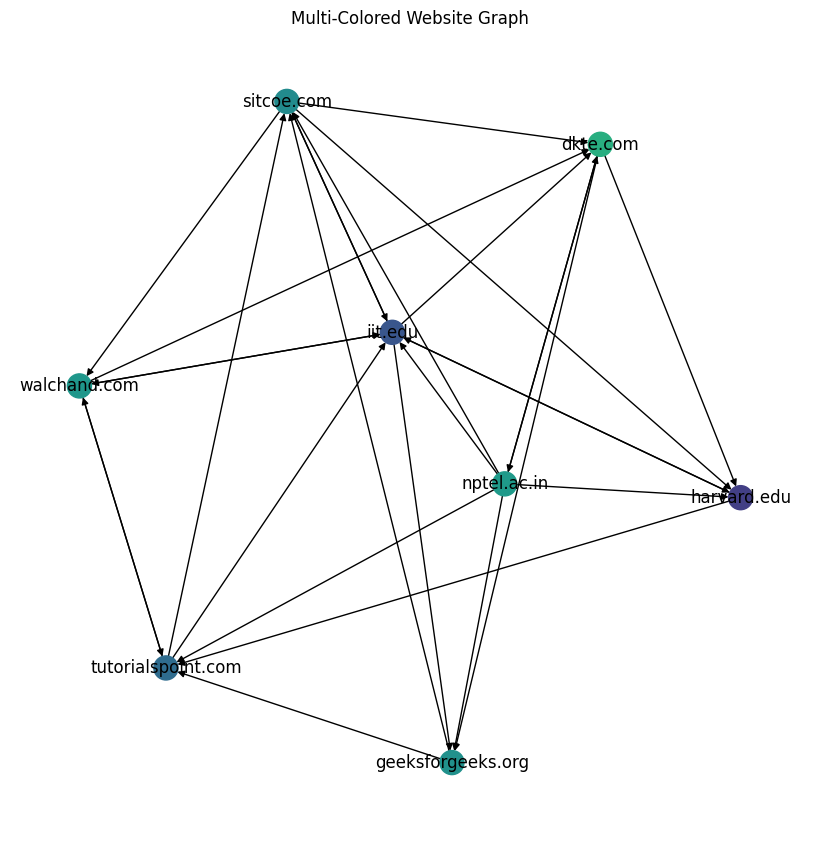

In-Degree PageRank:
sitcoe.com: 0.1317
geeksforgeeks.org: 0.0687
tutorialspoint.com: 0.1035
dkte.com: 0.1972
walchand.com: 0.1087
iit.edu: 0.1531
nptel.ac.in: 0.1703
harvard.edu: 0.0668

Out-Degree PageRank:
sitcoe.com: 0.1413
geeksforgeeks.org: 0.0932
tutorialspoint.com: 0.1535
dkte.com: 0.1234
walchand.com: 0.1241
iit.edu: 0.1874
nptel.ac.in: 0.0537
harvard.edu: 0.1232


In [9]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Website-node mapping
website_nodes = {
    "sitcoe.com": "sitcoe.com",
    "geeksforgeeks.org": "geeksforgeeks.org",
    "tutorialspoint.com": "tutorialspoint.com",
    "dkte.com": "dkte.com",
    "walchand.com": "walchand.com",
    "iit.edu": "iit.edu",
    "nptel.ac.in": "nptel.ac.in",
    "harvard.edu": "harvard.edu"
    # Add more websites and corresponding nodes here
}

def add_edges(G):
    websites = list(website_nodes.keys())

    for s in websites:
        for t in websites:
            if s != t:
                r = random.random()
                if r <= 0.5:
                    G.add_edge(s, t)
    return G

def calculate_in_degree_pagerank(G):
    in_degree_pagerank = nx.pagerank(G.reverse(), personalization=None)
    return in_degree_pagerank

def calculate_out_degree_pagerank(G):
    out_degree_pagerank = nx.pagerank(G, personalization=None)
    return out_degree_pagerank

def visualize_graph(G, node_colors):
    plt.figure(figsize=(8, 8))

    # Draw the graph with multi-colored nodes
    pos = nx.spring_layout(G, seed=42, k=0.2, iterations=50)
    nx.draw(G, pos, with_labels=True, node_size=300, node_color=node_colors, cmap=plt.get_cmap('viridis'))

    plt.title("In-Degree & Out-Degree Analysis")
    plt.show()

# Create a directed graph
G = nx.DiGraph()
websites = list(website_nodes.keys())
G.add_nodes_from(websites)
G = add_edges(G)

# Generate random colors for nodes
node_colors = [random.choice(plt.cm.viridis.colors) for _ in range(len(websites))]

# Visualize the complete graph with multi-colored nodes
visualize_graph(G, node_colors)

# Calculate In-Degree PageRank and Out-Degree PageRank
in_degree_pagerank = calculate_in_degree_pagerank(G)
out_degree_pagerank = calculate_out_degree_pagerank(G)

print("In-Degree PageRank:")
for website, score in in_degree_pagerank.items():
    print(f"{website}: {score:.4f}")

print("\nOut-Degree PageRank:")
for website, score in out_degree_pagerank.items():
    print(f"{website}: {score:.4f}")


**Hubs PageRank and Authorities PageRank**

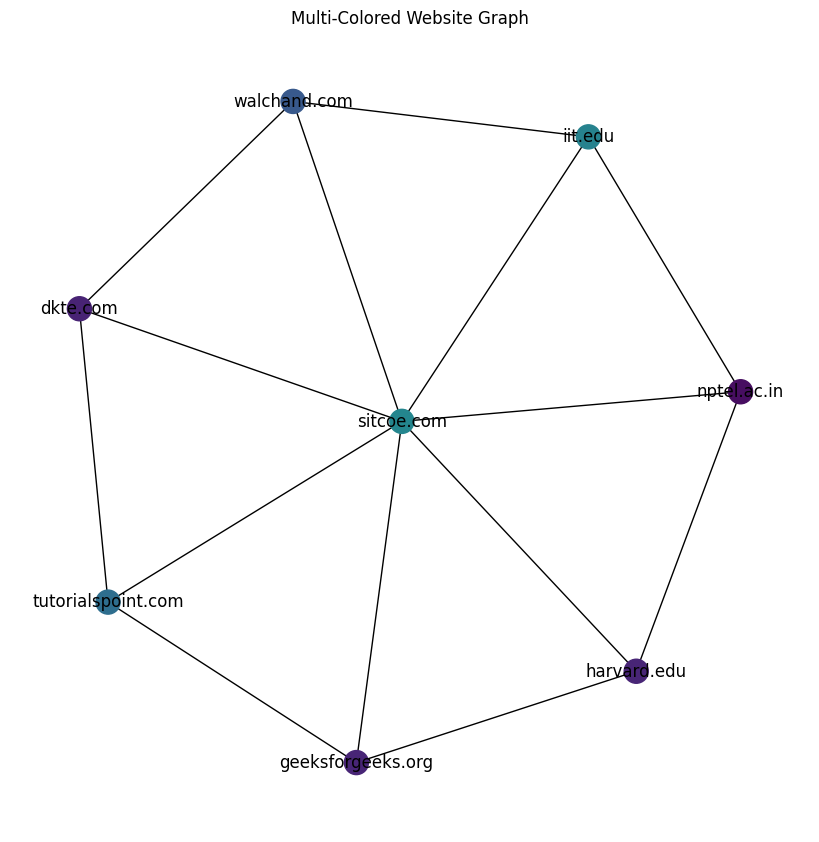

Hubs PageRank:
sitcoe.com: 0.2071
geeksforgeeks.org: 0.1133
tutorialspoint.com: 0.1133
dkte.com: 0.1133
walchand.com: 0.1133
iit.edu: 0.1133
nptel.ac.in: 0.1133
harvard.edu: 0.1133

Authorities PageRank:
sitcoe.com: 0.2071
geeksforgeeks.org: 0.1133
tutorialspoint.com: 0.1133
dkte.com: 0.1133
walchand.com: 0.1133
iit.edu: 0.1133
nptel.ac.in: 0.1133
harvard.edu: 0.1133


In [12]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Website-node mapping
website_nodes = {
    "sitcoe.com": "sitcoe.com",
    "geeksforgeeks.org": "geeksforgeeks.org",
    "tutorialspoint.com": "tutorialspoint.com",
    "dkte.com": "dkte.com",
    "walchand.com": "walchand.com",
    "iit.edu": "iit.edu",
    "nptel.ac.in": "nptel.ac.in",
    "harvard.edu": "harvard.edu"
    # Add more websites and corresponding nodes here
}

def add_edges(G):
    websites = list(website_nodes.keys())

    for s in websites:
        for t in websites:
            if s != t:
                r = random.random()
                if r <= 0.5:
                    G.add_edge(s, t)
    return G

def calculate_hubs_pagerank(G):
    hubs_pagerank, _ = nx.hits(G)
    return hubs_pagerank

def calculate_authorities_pagerank(G):
    _, authorities_pagerank = nx.hits(G)
    return authorities_pagerank

def visualize_graph(G, node_colors):
    plt.figure(figsize=(8, 8))

    # Draw the graph with multi-colored nodes
    pos = nx.spring_layout(G, seed=42, k=0.2, iterations=50)
    nx.draw(G, pos, with_labels=True, node_size=300, node_color=node_colors, cmap=plt.get_cmap('viridis'))

    plt.title("Hubness & Authorities of a Node")
    plt.show()

# Create a wheel graph
G = nx.wheel_graph(len(website_nodes))
labels = dict(enumerate(website_nodes.values()))
G = nx.relabel_nodes(G, labels)

# Generate random colors for nodes
node_colors = [random.choice(plt.cm.viridis.colors) for _ in range(len(website_nodes))]

# Visualize the wheel graph with multi-colored nodes
visualize_graph(G, node_colors)

# Calculate Hubs PageRank and Authorities PageRank
hubs_pagerank = calculate_hubs_pagerank(G)
authorities_pagerank = calculate_authorities_pagerank(G)

print("Hubs PageRank:")
for website, score in hubs_pagerank.items():
    print(f"{website}: {score:.4f}")

print("\nAuthorities PageRank:")
for website, score in authorities_pagerank.items():
    print(f"{website}: {score:.4f}")


<ipython-input-1-c9796dca8726>:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5, 5))  # Reduce the figure size to half


<Figure size 640x480 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

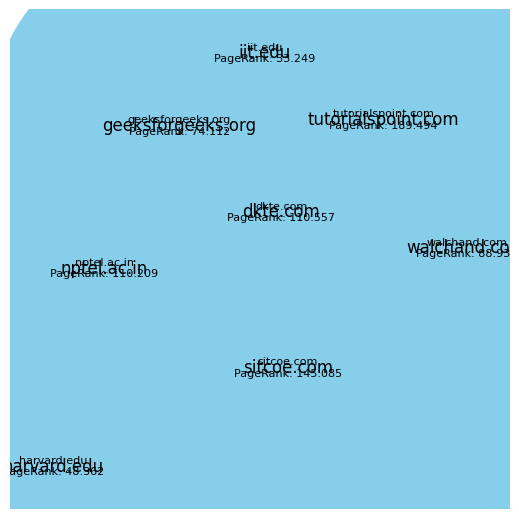

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from IPython.display import HTML
from ipywidgets import interact
from matplotlib.animation import FuncAnimation

# Website-node mapping
website_nodes = {
    "sitcoe.com": "sitcoe.com",
    "geeksforgeeks.org": "geeksforgeeks.org",
    "tutorialspoint.com": "tutorialspoint.com",
    "dkte.com": "dkte.com",
    "walchand.com": "walchand.com",
    "iit.edu": "iit.edu",
    "nptel.ac.in": "nptel.ac.in",
    "harvard.edu": "harvard.edu"
    # Add more websites and corresponding nodes here
}

def add_edges(G):
    websites = list(website_nodes.keys())

    for s in websites:
        for t in websites:
            if s != t:
                r = random.random()
                if r <= 0.5:
                    G.add_edge(s, t)
    return G

def calculate_pagerank(G):
    pagerank = nx.pagerank(G)
    return pagerank

def plot_graph_with_pagerank(G, pagerank):
    plt.figure(figsize=(5, 5))  # Reduce the figure size to half

    # Calculate node sizes based on PageRank values
    node_sizes = [pagerank[website] * 1000 for website in G.nodes()]

    # Draw the graph with labels and adjusted node sizes
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue')

    # Display PageRank values as labels
    labels = {website: f"{website}\nPageRank: {pagerank[website]:.3f}" for website in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=8)

def animate_distribution(G, frames):
    points = {website: 100 for website in website_nodes.values()}

    def update(frame):
        plt.clf()
        plot_graph_with_pagerank(G, points)

        new_points = distribute_points(G, points)
        points.update(new_points)

    fig, ax = plt.subplots()
    ani = FuncAnimation(fig, update, frames=frames, repeat=False)

    return ani

def distribute_points(G, points):
    new_points = {website: 0 for website in website_nodes.values()}

    for website in website_nodes.values():
        out = list(G.out_edges(website))
        if len(out) == 0:
            new_points[website] += points[website]
        else:
            share = points[website] / len(out)
            for (_, tgt) in out:
                new_points[tgt] += share
    return new_points

# Create a directed graph
G = nx.DiGraph()
websites = list(website_nodes.keys())
G.add_nodes_from(websites)
G = add_edges(G)

# Define the number of frames for the animation
frames = 50

# Animate PageRank distribution
ani = animate_distribution(G, frames)
HTML(ani.to_jshtml())


*Validating Data*

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def add_edges():
  nodes=list(G.nodes())

  for s in nodes:
    for t in nodes:
      if s!=t:
        r=random.random()
        if (r<=0.5):
          G.add_edge(s,t)
  return G

def assign_points(G):
  nodes=list(G.nodes())
  p=[]
  for each in nodes:
    p.append(100)
  return p

def distribute_points(G, points):
  nodes=list(G.nodes())
  new_points=[]
  for i in range(len(nodes)):
    new_points.append(0)

  for n in nodes:
    out=list(G.out_edges(n))
    if len(out)==0:
      new_points[n]=new_points[n]+points[n]
    else:
      share=points[n]/len(out)
      for(src, tgt) in out:
        new_points[tgt]=new_points[tgt]+share
  return new_points

def keep_distributing (points, G):
  while(1)  :
    new_points = distribute_points(points, G)
    print(new_points)
    points=new_points
    stop=input("Press # to stop or any other to continue")
    if stop=="#":
      break
  return new_points


#create a directed graph
G=nx.DiGraph()
G.add_nodes_from([i for i in range(10)])
G=add_edges()

#visualize the graph
nx.draw(G, with_labels = True)
plt.show()

#assign initial points
points = assign_points(G)

#keep distributing
final_points = keep_distributing(points, G)

{'sitcoe.com': 100.0, 'geeksforgeeks.org': 58.333333333333336, 'tutorialspoint.com': 108.33333333333334, 'dkte.com': 191.66666666666669, 'walchand.com': 58.333333333333336, 'iit.edu': 75.0, 'nptel.ac.in': 25.0, 'harvard.edu': 183.33333333333334}
Press # to stop or any other key to continue: #


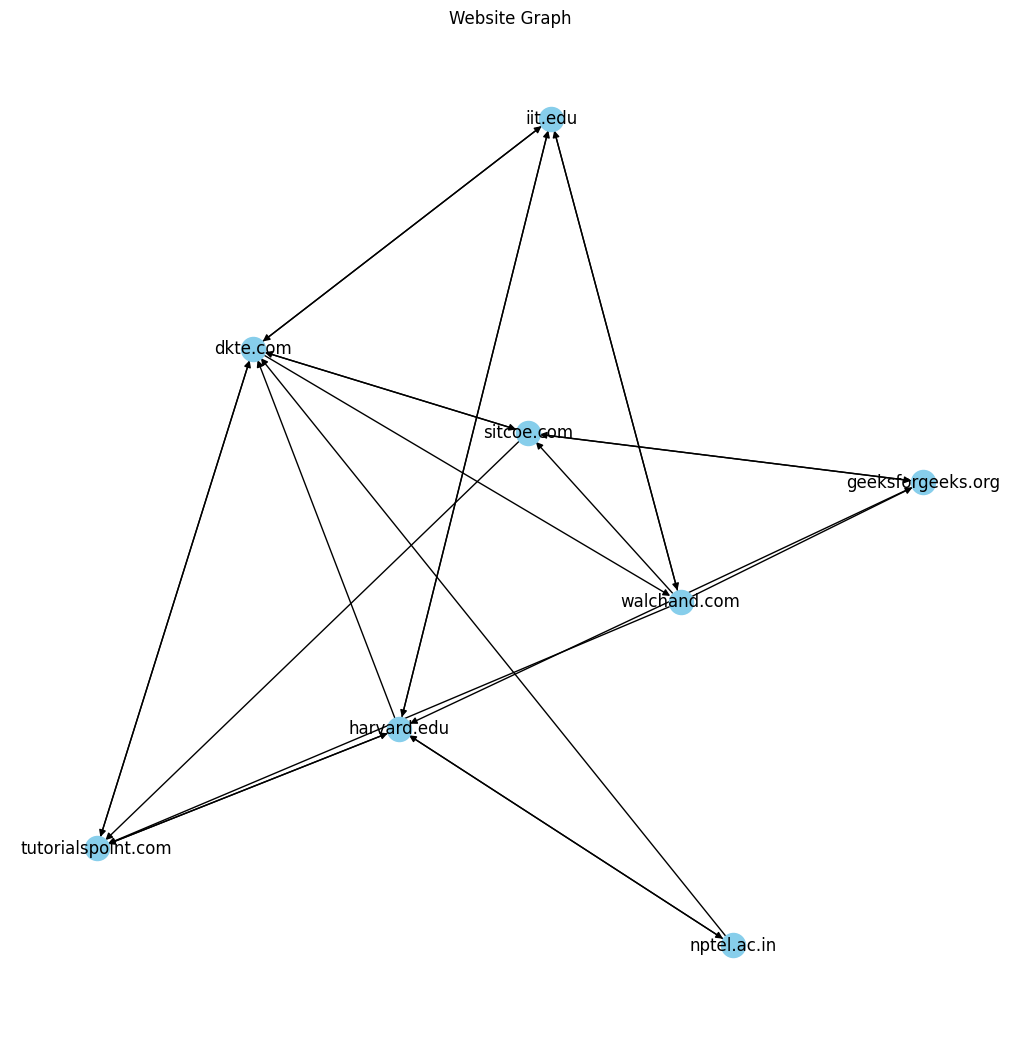

In [13]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Website-node mapping
website_nodes = {
    "sitcoe.com": "sitcoe.com",
    "geeksforgeeks.org": "geeksforgeeks.org",
    "tutorialspoint.com": "tutorialspoint.com",
    "dkte.com": "dkte.com",
    "walchand.com": "walchand.com",
    "iit.edu": "iit.edu",
    "nptel.ac.in": "nptel.ac.in",
    "harvard.edu": "harvard.edu"
    # Add more websites and corresponding nodes here
}

def add_edges(G):
    websites = list(website_nodes.keys())

    for s in websites:
        for t in websites:
            if s != t:
                r = random.random()
                if r <= 0.5:
                    G.add_edge(s, t)
    return G

def calculate_pagerank(G):
    pagerank = nx.pagerank(G)
    return pagerank

def plot_graph(G):
    plt.figure(figsize=(10, 10))

    # Draw the graph with labels
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='skyblue')

    plt.title("Website Graph")
    plt.show()

# Create a directed graph
G = nx.DiGraph()
websites = list(website_nodes.keys())
G.add_nodes_from(websites)
G = add_edges(G)

# Assign initial points
points = {website: 100 for website in websites}

def distribute_points(G, points):
    new_points = {website: 0 for website in websites}

    for website in websites:
        out = list(G.out_edges(website))
        if len(out) == 0:
            new_points[website] += points[website]
        else:
            share = points[website] / len(out)
            for (_, tgt) in out:
                new_points[tgt] += share
    return new_points

# Keep distributing
while True:
    new_points = distribute_points(G, points)
    print(new_points)
    points = new_points
    stop = input("Press # to stop or any other key to continue: ")
    if stop == "#":
        break

# Display the graph without PageRank information
plot_graph(G)
